## [作業重點]
使用 Sklearn 中的 Lasso, Ridge 模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義。

機器學習的模型非常多種，但要訓練的資料多半有固定的格式，確保你了解訓練資料的格式為何，這樣在應用新模型時，就能夠最快的上手開始訓練！

## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則化來觀察訓練情形。

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

{'data': array([[  5., 162.,  60.],
       [  2., 110.,  60.],
       [ 12., 101., 101.],
       [ 12., 105.,  37.],
       [ 13., 155.,  58.],
       [  4., 101.,  42.],
       [  8., 101.,  38.],
       [  6., 125.,  40.],
       [ 15., 200.,  40.],
       [ 17., 251., 250.],
       [ 17., 120.,  38.],
       [ 13., 210., 115.],
       [ 14., 215., 105.],
       [  1.,  50.,  50.],
       [  6.,  70.,  31.],
       [ 12., 210., 120.],
       [  4.,  60.,  25.],
       [ 11., 230.,  80.],
       [ 15., 225.,  73.],
       [  2., 110.,  43.]]), 'feature_names': ['Chins', 'Situps', 'Jumps'], 'target': array([[191.,  36.,  50.],
       [189.,  37.,  52.],
       [193.,  38.,  58.],
       [162.,  35.,  62.],
       [189.,  35.,  46.],
       [182.,  36.,  56.],
       [211.,  38.,  56.],
       [167.,  34.,  60.],
       [176.,  31.,  74.],
       [154.,  33.,  56.],
       [169.,  34.,  50.],
       [166.,  33.,  52.],
       [154.,  34.,  64.],
       [247.,  46.,  50.],
       [193., 

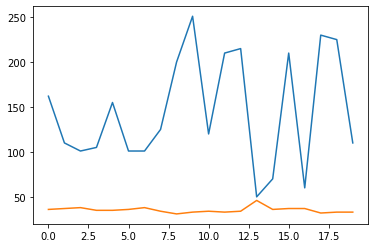

In [63]:
linnerud = datasets.load_linnerud()

print(linnerud) 
plt.plot(linnerud.data[:, np.newaxis, 1])
plt.plot(linnerud.target[:, np.newaxis, 1])

data = linnerud.data
target = linnerud.target

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

In [64]:
print(regr.coef_)

[[-1.28756417 -0.18005567  0.0724611 ]
 [-0.23553638 -0.03945105  0.03009547]
 [ 0.17356644  0.05247911 -0.03166777]]


In [65]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 386.15


In [72]:
# lass0
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=4)

# 建立一個線性回歸模型
lasso = linear_model.Lasso(alpha=10.0)

# 將訓練資料丟進去模型訓練
lasso.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = lasso.predict(x_test)

In [73]:
lasso.coef_

array([[-0.58221842, -0.20958465,  0.05634205],
       [-0.        , -0.04376079,  0.01805997],
       [ 0.        ,  0.05346042, -0.02016942]])

In [74]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 361.89


In [75]:
#ridge 
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=4)

# 建立一個線性回歸模型
ridge = linear_model.Ridge(alpha=10.0)

# 將訓練資料丟進去模型訓練
ridge.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

In [76]:
# 印出 Ridge 的參數，可以很明顯看到比起 Linear Regression，參數的數值都明顯小了許多
print(ridge.coef_)

[[-1.231163   -0.18301286  0.07190008]
 [-0.22522776 -0.03998578  0.02998478]
 [ 0.16602179  0.05286138 -0.03157755]]


In [77]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 386.15
